In [1]:
import os

In [2]:
file_list = ["./data/CSE3F-GUEST-1520472698/ap_selected.txt",
             "./data/CSE3F-PROTECTED-1520471250/ap_selected.txt",
             "./data/LIB_GUEST-1520484258/ap_selected.txt",
             "./data/LIB_PROTECTED-1520479701/ap_selected.txt",
             "./data/PC_GUEST-1521341138/ap_selected.txt",
             "./data/PC-GUEST-1521327683/ap_selected.txt",
             "./data/PC-PROTECTED-1521325439/ap_selected.txt",
             "./data/PC-PROTECTED-1521339668/ap_selected.txt"]
file_list_1 = ["./data/CSE3F-GUEST-1520472698/bandwidth.txt",
               "./data/CSE3F-PROTECTED-1520471250/bandwidth.txt",
               "./data/LIB_GUEST-1520484258/bandwidth.txt",
               "./data/LIB_PROTECTED-1520479701/bandwidth.txt",
               "./data/PC_GUEST-1521341138/bandwidth.txt",
               "./data/PC-GUEST-1521327683/bandwidth.txt",
               "./data/PC-PROTECTED-1521325439/bandwidth.txt",
               "./data/PC-PROTECTED-1521339668/bandwidth.txt"]
file_list_2 = ["./data/CSE3F-GUEST-1520472698/latency.txt",
               "./data/CSE3F-PROTECTED-1520471250/latency.txt",
               "./data/LIB_GUEST-1520484258/latency.txt",
               "./data/LIB_PROTECTED-1520479701/latency.txt",
               "./data/PC_GUEST-1521341138/latency.txt",
               "./data/PC-GUEST-1521327683/latency.txt",
               "./data/PC-PROTECTED-1521325439/latency.txt",
               "./data/PC-PROTECTED-1521339668/latency.txt"]


In [3]:
#0 cse3f_guest
#1 cse3f_protect
#2 lib_guest
#3 lib_protect
#4 pc_guest_1
#5 pc_guest_2
#6 pc_protected_1
#7 pc_protected_2
import math

dict_all = []
for i in range(0, len(file_list)):
    dict_ = {}
    file_ = file_list[i]
    with open(file_) as f:
        for line in f:
            line_ = line.strip().replace(" ", "")
            if "MACAddress" in line_:
                #print line_
                MACAddress = line_[line_.index(":") + 1:]
                #print MACAddress
                if MACAddress not in dict_.keys():
                    #print MACAddress
                    dict_[MACAddress] = {}
                #print MACAddress
            if "PHY" in line_:
                type_ = line_.split(":")[1].strip()
                if type_ == "802.11g/n" or type_ == "802.11n":
                    dict_[MACAddress]["type"] = 0.0
                else:
                    dict_[MACAddress]["type"] = 1.0
            if "RSSI" in line_:
                #print line_
                RSSI = line_[line_.index(":") + 1:]
                dict_[MACAddress]["RSSI"] = RSSI
                #print RSSI
            if "AverageSignalQuality" in line_:
                #print line_
                AverageSignalQuality = line_[line_.index(":") + 1:]
                dict_[MACAddress]["AverageSignalQuality"] = AverageSignalQuality
                #print AverageSignalQuality
            if "ChannelUtilization" in line_:
                #print line_
                ChannelUtilization = line_[line_.index(":") + 1:line_.index("%")]
                dict_[MACAddress]["ChannelUtilization"] = ChannelUtilization
                #print ChannelUtilization
                #break
            if "MaximumSpeed" in line_:
                #print line_
                MaximumSpeed = line_[line_.index(":") + 1:line_.index("Mbps")]
                dict_[MACAddress]["MaximumSpeed"] = MaximumSpeed
                #print MaximumSpeed
            if "ChannelWidth" in line_:
                #print line_
                ChannelWidth = line_[line_.index(":") + 1:line_.index("MHz")]
                dict_[MACAddress]["ChannelWidth"] = ChannelWidth
                #print ChannelWidth
            if "Frequency" in line_:
                #print line_
                Frequency = line_[line_.index(":") + 1:]
                dict_[MACAddress]["Frequency"] = Frequency
                #print Frequency
            if "Channel" in line_ and "ChannelsRange" not in line_ and "ChannelWidth" not in line_ and "ChannelUtilization" not in line_:
                #print line_
                Channel = line_[line_.index(":") + 1:]
                dict_[MACAddress]["Channel"] = Channel
                #print Channel

    file_ = file_list_1[i]
    with open(file_) as f:
        for line in f:
            line_ = line.strip().replace(" ", "")
            #print line_
            if "==" in line_:
                line_ = line_[4:-4]
                #print line_
                MACAddress = line_
            if "MB/s" in line_:
                dict_[MACAddress]["bandwidth"] = line_[line_.index("(") + 1 : line_.index("MB/s")]
            if "KB/s" in line_:
                temp = line_[line_.index("(") + 1 : line_.index("KB/s")]
                temp = float(temp) * 0.001
                dict_[MACAddress]["bandwidth"] = temp
    

    file_ = file_list_2[i]
    with open(file_) as f:
        for line in f:
            line_ = line.strip().replace(" ", "")
            #print line_
            if "==" in line_:
                line_ = line_[4:-4]
                #print line_
                MACAddress = line_
                #print MACAddress
            if "avg" in line_:
                dict_[MACAddress]["latency"] = line_[line_.index(":") + 1 : line_.index(",")]
                res = float(line_[line_.index(":") + 1 : line_.index(",")])
                if math.isnan(res):
                    try:
                        del dict_[MACAddress]
                    except KeyError:
                        pass
                    
    if "bandwidth" not in dict_[MACAddress].keys():
        try:
            del dict_[MACAddress]
        except KeyError:
            pass
        
    dict_all.append(dict_)

In [4]:
attribute_list = dict_all[0][dict_all[0].keys()[0]].keys()
print attribute_list
print "index of latency: ", attribute_list.index('latency')
print "index of bandwidth: ", attribute_list.index('bandwidth')
print "index of type: ", attribute_list.index('type')
print "length of attribute: ", len(attribute_list)
cnt = 0
list_address_num = []
for dict_ in dict_all:
    cnt += len(dict_.keys())
    list_address_num.append(len(dict_.keys()))
print list_address_num

['latency', 'ChannelWidth', 'ChannelUtilization', 'MaximumSpeed', 'AverageSignalQuality', 'bandwidth', 'Frequency', 'RSSI', 'type', 'Channel']
index of latency:  0
index of bandwidth:  5
index of type:  8
length of attribute:  10
[11, 9, 13, 16, 12, 18, 18, 19]


In [5]:
print dict_all[0]["A0-3D-6F-0B-A5-E1"]

{'latency': '14.157599999999999', 'ChannelWidth': '20', 'ChannelUtilization': '37.6', 'MaximumSpeed': '216', 'AverageSignalQuality': '68.0', 'bandwidth': 0.746, 'Frequency': '2.437', 'RSSI': '-66', 'type': 0.0, 'Channel': '6'}


In [6]:
#np.concatenate((a, b))
alpha_ = 0.5
beta_ = 0.5
import numpy as np
list_label = []
list_label_rssi = []
array_all = np.zeros((0, 8))
array_all_2 = np.zeros((0, 10))
import numpy as np
temp_cnt = 0
for i_ in range(len(dict_all)):
    dict_ = dict_all[i_]
    temp_cnt += 1
    #print "dict_:", temp_cnt
    
    cnt_temp = 0
    for i in range(len(dict_.keys())):
        address = dict_.keys()[i]
        dict_temp = dict_[address]
        if "bandwidth" in dict_temp.keys():
            #print "bandwith problem: ", i_
            cnt_temp += 1
    
    array_ = np.zeros((cnt_temp, 10))
    #print "cnt_temp: ", cnt_temp
    i = 0
    for address in dict_.keys():
        dict_temp = dict_[address]
        if "bandwidth" not in dict_temp.keys():
            print address 
            print i_
            continue
        for j in range(len(attribute_list)):
            attribute = attribute_list[j]
            array_[i][j] = float(dict_[address][attribute])
        i += 1
    #print "i: ", i
    array_2 = np.zeros(array_.shape)
    for i_ in range(array_.shape[0]):
        for j_ in range(array_.shape[1]):
            if j_ == 8:
                array_2[i_,j_] = array_[i_,j_]
                #print array_2[i_,j_]
            else:
                array_2[i_,j_] = (array_[i_,j_] - min(array_[:,j_])) / (max(array_[:,j_]) - min(array_[:,j_]))
        
    priority_ = np.zeros((array_2.shape[0], 1))
    for k in range(array_2.shape[0]):
        priority_[k] = -alpha_ * array_2[k][0] + beta_ * array_2[k][5]

    priority_.resize((1, array_2.shape[0]))
    
    rssi_ = array_2[:,7]
    
    z = np.argsort(priority_)
    z_ = np.argsort(rssi_)
    print priority_
    print z
    for k_ in range(array_2.shape[0]):
        if k_ in z[0, -int(math.ceil(0.2*array_2.shape[0])):]:
            list_label.append(1)
        else:
            list_label.append(0)
    for k_ in range(array_2.shape[0]):
        if k_ in z_[-int(math.ceil(0.2*array_2.shape[0])):]:
            list_label_rssi.append(1)
        else:
            list_label_rssi.append(0)
    array_3= np.zeros((array_.shape[0], 8))
    array_3[:,0:4] = array_2[:, 1:5]
    array_3[:,4:] = array_2[:, 6:]
    
    array_all = np.concatenate((array_all, array_3)) 
    array_all_2 = np.concatenate((array_all_2, array_)) 

[[ 0.11092571  0.5         0.2854099   0.21094332 -0.07484149  0.09935065
  -0.48435069 -0.289642    0.03664783 -0.44536581  0.0931163 ]]
[[ 6  9  7  4  8 10  5  0  3  2  1]]
[[-0.41745135 -0.02605705  0.28788261 -0.01176708  0.48201738  0.0390398
   0.00592005  0.21633947  0.02073977]]
[[0 1 3 6 8 5 7 2 4]]
[[-0.09846898  0.14905753 -0.05806963  0.11197402  0.02599668  0.49407328
   0.36306645  0.29462819  0.05025892 -0.46173397 -0.04319438  0.28348416
   0.04225309]]
[[ 9  0  2 10  4 12  8  3  1 11  7  6  5]]
2C-33-11-5D-D5-CF
3
E8-65-49-62-4C-DF
3
[[ 0.05210319  0.35710266 -0.04959755 -0.04470731  0.14136823 -0.01235288
   0.3708926   0.01445304  0.39519365 -0.00785499  0.26180566  0.10321367
  -0.45242825  0.17156309]]
[[12  2  3  5  9  7  0 11  4 13 10  1  6  8]]
[[ 0.09134672  0.0033911   0.00368743 -0.12200828  0.5         0.06531236
  -0.08118475 -0.29569261  0.07184091  0.00183271 -0.10568759  0.01643203]]
[[ 7  3 10  6  9  1  2 11  5  8  0  4]]
[[-0.01431589 -0.20557168  0.49

In [7]:
print len(list_label)
print array_all.shape
#print array_all
#print array_all[:,5]
temp = [11, 9, 13, 14, 12, 18, 18, 19]
print sum(temp)
print np.argmax(array_all[:,5][:11])
print np.argmax(array_all[:,5][11:20])
print np.argmax(array_all[:,5][20:33])
print np.argmax(array_all[:,5][33:47])
print np.argmax(array_all[:,5][47:59])
print np.argmax(array_all[:,5][59:77])
print np.argmax(array_all[:,5][77:95])
print np.argmax(array_all[:,5][95:114])

114
(114, 8)
114
1
4
8
1
4
2
4
3


In [43]:
def mean_(list_):
    return sum(list_)*1.0/len(list_)
print array_all_2.shape
print "latency"
latency_rssi = []
bd_rssi = []
print latency_rssi.append(array_all_2[:,0][:11][1])
print latency_rssi.append(array_all_2[:,0][11:20][4])
print latency_rssi.append(array_all_2[:,0][20:33][8])
print latency_rssi.append(array_all_2[:,0][33:47][1])
print latency_rssi.append(array_all_2[:,0][47:59][4])
print latency_rssi.append(array_all_2[:,0][59:77][2])
print latency_rssi.append(array_all_2[:,0][77:95][4])
print latency_rssi.append(array_all_2[:,0][95:114][3])
print "bd"
print bd_rssi.append(array_all_2[:,5][:11][1])
print bd_rssi.append(array_all_2[:,5][11:20][4])
print bd_rssi.append(array_all_2[:,5][20:33][8])
print bd_rssi.append(array_all_2[:,5][33:47][1])
print bd_rssi.append(array_all_2[:,5][47:59][4])
print bd_rssi.append(array_all_2[:,5][59:77][2])
print bd_rssi.append(array_all_2[:,5][77:95][4])
print bd_rssi.append(array_all_2[:,5][95:114][3])

# [0 1 1 1 0 0 0 0 0 0] 1,2,3
# [0 0 1 0 1 0 0 1] 2,4,7
# [0 0 0 0 0 0 0 1 1 0 0 1] 7,8,11
# [0 1 0 0 1 0 1 0 1 0 1 0 0] 1,4,6,8,10
# [0 1 0 1 1 0 0 0 0 0 0] 2,4,5
# [0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
# [0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]
# [0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
print "latency"
latency_dt = []
bd_dt = []
print latency_dt.append(max([array_all_2[:,0][:11][1], array_all_2[:,0][:11][2], array_all_2[:,0][:11][3]]))
print latency_dt.append(max([array_all_2[:,0][11:20][2],array_all_2[:,0][11:20][4],array_all_2[:,0][11:20][7]]))
print latency_dt.append(max([array_all_2[:,0][20:33][7],array_all_2[:,0][20:33][8],array_all_2[:,0][20:33][11]]))
print latency_dt.append(max([array_all_2[:,0][33:47][1],array_all_2[:,0][33:47][4],array_all_2[:,0][33:47][6],array_all_2[:,0][33:47][8],array_all_2[:,0][33:47][10]]))
print latency_dt.append(max([array_all_2[:,0][47:59][2], array_all_2[:,0][47:59][4], array_all_2[:,0][47:59][5]]))
print latency_dt.append(max([array_all_2[:,0][59:77][2],array_all_2[:,0][59:77][5],array_all_2[:,0][59:77][6],array_all_2[:,0][59:77][10]]))
print latency_dt.append(max([array_all_2[:,0][77:95][4],array_all_2[:,0][77:95][8],array_all_2[:,0][77:95][12],array_all_2[:,0][77:95][16]]))
print latency_dt.append(max([array_all_2[:,0][95:114][3],array_all_2[:,0][95:114][4],array_all_2[:,0][95:114][9]]))
print "bd"
print bd_dt.append(min([array_all_2[:,5][:11][1], array_all_2[:,5][:11][2], array_all_2[:,5][:11][3]]))
print bd_dt.append(min([array_all_2[:,5][11:20][2],array_all_2[:,5][11:20][4],array_all_2[:,5][11:20][7]]))
print bd_dt.append(min([array_all_2[:,5][20:33][7],array_all_2[:,5][20:33][8],array_all_2[:,5][20:33][11]]))
print bd_dt.append(min([array_all_2[:,5][33:47][1],array_all_2[:,5][33:47][4],array_all_2[:,5][33:47][6],array_all_2[:,5][33:47][8],array_all_2[:,5][33:47][10]]))
print bd_dt.append(min([array_all_2[:,5][47:59][2], array_all_2[:,5][47:59][4], array_all_2[:,5][47:59][5]]))
print bd_dt.append(min([array_all_2[:,5][59:77][2],array_all_2[:,5][59:77][5],array_all_2[:,5][59:77][6],array_all_2[:,5][59:77][10]]))
print bd_dt.append(min([array_all_2[:,5][77:95][4],array_all_2[:,5][77:95][8],array_all_2[:,5][77:95][12],array_all_2[:,5][77:95][16]]))
print bd_dt.append(min([array_all_2[:,5][95:114][3],array_all_2[:,5][95:114][4],array_all_2[:,5][95:114][9]]))
print "latency"
for i in range(len(latency_rssi)):
    print position[i]
    print (latency_rssi[i] - latency_dt[i]) * 1.0 / latency_rssi[i]
print "bd"
for i in range(len(latency_rssi)):
    print position[i]
    print (bd_dt[i] - bd_rssi[i]) * 1.0 / bd_rssi[i]


(114, 10)
latency
None
None
None
None
None
None
None
None
bd
None
None
None
None
None
None
None
None
latency
None
None
None
None
None
None
None
None
bd
None
None
None
None
None
None
None
None
latency
cse3f_guest
-0.113287068382
cse3f_protect
-0.0378032616839
lib_guest
0.0
lib_protect
0.0
pc_guest_1
-0.716292134831
pc_guest_2
-3.01583282114
pc_protected_1
0.0
pc_protected_2
-0.13661728865
bd
cse3f_guest
-0.504424778761
cse3f_protect
-0.513888888889
lib_guest
0.0
lib_protect
-0.475352112676
pc_guest_1
-0.839269406393
pc_guest_2
-0.940637450199
pc_protected_1
-0.614401858304
pc_protected_2
-0.0421052631579


In [9]:
true_pos = 0
for i in range(len(list_label_rssi)):
    if list_label_rssi[i] == 1 and list_label_rssi[i] == list_label[i]:
        true_pos += 1
print true_pos
predit_pos = list_label_rssi.count(1)
pos_ = list_label.count(1)
print "recall: ", true_pos * 1.0 / pos_
print "accuracy: ", true_pos * 1.0 / predit_pos

11
recall:  0.423076923077
accuracy:  0.423076923077


In [10]:
#print array_2
# index of latency:  0
# index of bandwidth:  5
# index of type:  8
cnt_type_ac = 0
cnt_type_n = 0
print array_all_2.shape
for i in range(array_all_2.shape[0]):
    #print array_all_2[i, 8]
    if abs(array_all_2[i, 8] - 1.0) < 1.0e-5:
        cnt_type_ac += 1
    elif abs(array_all_2[i, 8] - 0.0) < 1.0e-5:
        cnt_type_n += 1
print cnt_type_ac
print cnt_type_n
print cnt_type_ac + cnt_type_n

(114, 10)
77
37
114


type_n_lantency avg_time
17.0976432432
type_ac_lantency avg_time
27.3815545455


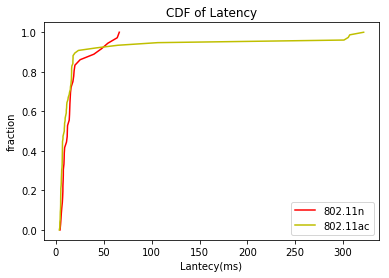

In [11]:
type_ac_bandwidth = []
type_ac_lantency = []
type_n_bandwidth = []
type_n_lantency = []
for i in range(array_all_2.shape[0]):
    #print array_all_2[i, 8]
    if abs(array_all_2[i, 8] - 1.0) < 1.0e-5:
        type_ac_lantency.append(array_all_2[i, 0])
        type_ac_bandwidth.append(array_all_2[i, 5])
    elif abs(array_all_2[i, 8] - 0.0) < 1.0e-5:
        type_n_lantency.append(array_all_2[i, 0])
        type_n_bandwidth.append(array_all_2[i, 5])
#print type_n_lantency
#print type_ac_lantency
print "type_n_lantency avg_time"
print sum(type_n_lantency) * 1.0 / len(type_n_lantency)
print "type_ac_lantency avg_time"
print sum(type_ac_lantency) * 1.0 / len(type_ac_lantency)
import numpy as np
import matplotlib.pyplot as plt

sorted_data = np.sort(type_n_lantency)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(type_ac_lantency)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.title("CDF of Latency")
plt.ylabel('fraction')
plt.xlabel('Lantecy(ms)')
plt.plot(sorted_data,yvals, 'r', label = "802.11n")
plt.plot(sorted_data_1,yvals_1, 'y', label = "802.11ac")
plt.legend(loc='lower right')
plt.show()

type_n_lantency bandwidth
3.44967567568
type_ac_lantency bandwidth
6.7592987013


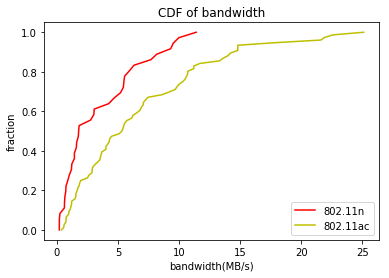

In [12]:
print "type_n_lantency bandwidth"
print sum(type_n_bandwidth) * 1.0 / len(type_n_bandwidth)
print "type_ac_lantency bandwidth"
print sum(type_ac_bandwidth) * 1.0 / len(type_ac_bandwidth)
import numpy as np
import matplotlib.pyplot as plt

sorted_data = np.sort(type_n_bandwidth)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(type_ac_bandwidth)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.title("CDF of bandwidth")
plt.ylabel('fraction')
plt.xlabel('bandwidth(MB/s)')
plt.plot(sorted_data,yvals, 'r', label = "802.11n")
plt.plot(sorted_data_1,yvals_1, 'y', label = "802.11ac")
plt.legend(loc='lower right')
plt.show()

['latency', 'ChannelWidth', 'ChannelUtilization', 'MaximumSpeed', 'AverageSignalQuality', 'bandwidth', 'Frequency', 'RSSI', 'type', 'Channel']

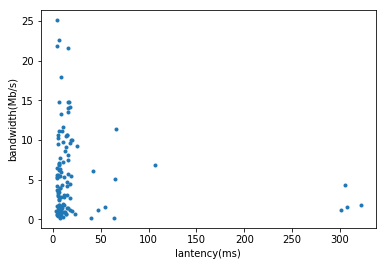

In [13]:
lantency = array_all_2[:,0]
bandwidth = array_all_2[:,5]

plt.xlabel("lantency(ms)")
plt.ylabel("bandwidth(Mb/s)")
plt.plot(lantency, bandwidth, '.')
plt.show()

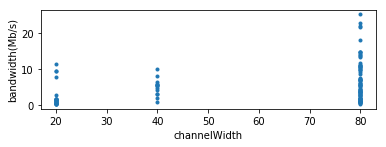

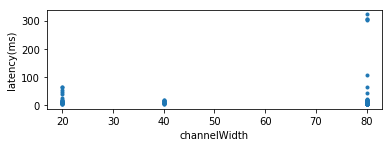

In [14]:
lantency = array_all_2[:,0]
bandwidth = array_all_2[:,5]
ChannelWidth = array_all_2[:,1]
plt.subplot(211)
plt.xlabel("channelWidth")
plt.ylabel("bandwidth(Mb/s)")
plt.plot(ChannelWidth, bandwidth, '.')
plt.show()
plt.subplot(212)
plt.xlabel("channelWidth")
plt.ylabel("latency(ms)")
plt.plot(ChannelWidth, lantency, '.')
plt.show()

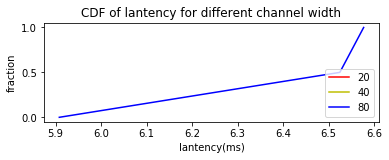

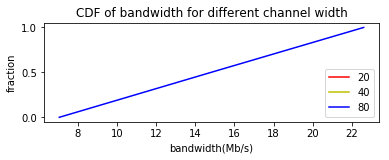

In [15]:
ChannelWidth = array_all_2[:,1]
ChannelWidth_lantency_20 = []
ChannelWidth_bandwidth_20 = []
ChannelWidth_lantency_40 = []
ChannelWidth_bandwidth_40 = []
ChannelWidth_lantency_80 = []
ChannelWidth_bandwidth_80 = []
for i in range(len(ChannelUtilization)):
    if ChannelWidth[i] == 20:
        ChannelWidth_lantency_20.append(lantency[i])
        ChannelWidth_bandwidth_20.append(bandwidth[i])
    elif ChannelWidth[i] == 40:
        ChannelWidth_lantency_40.append(lantency[i])
        ChannelWidth_bandwidth_40.append(bandwidth[i])
    else:
        ChannelWidth_lantency_80.append(lantency[i])
        ChannelWidth_bandwidth_80.append(bandwidth[i])

sorted_data = np.sort(ChannelWidth_lantency_20)
yvals = np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(ChannelWidth_lantency_40)
yvals_1 = np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)
sorted_data_2 = np.sort(ChannelWidth_lantency_80)
yvals_2 = np.arange(len(sorted_data_2))/float(len(sorted_data_2)-1)

plt.subplot(211) 
plt.title("CDF of lantency for different channel width")
plt.ylabel('fraction')
plt.xlabel('lantency(ms)')
plt.plot(sorted_data,  yvals,   'r', label = "20")
plt.plot(sorted_data_1,yvals_1, 'y', label = "40")
plt.plot(sorted_data_2,yvals_2, 'b', label = "80")
plt.legend(loc='lower right')
plt.show()

sorted_data = np.sort(ChannelWidth_bandwidth_20)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(ChannelWidth_bandwidth_40)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)
sorted_data_2 = np.sort(ChannelWidth_bandwidth_80)
yvals_2=np.arange(len(sorted_data_2))/float(len(sorted_data_2)-1)

plt.subplot(212) 
plt.title("CDF of bandwidth for different channel width")
plt.ylabel('fraction')
plt.xlabel('bandwidth(Mb/s)')
plt.plot(sorted_data,  yvals,   'r', label = "20")
plt.plot(sorted_data_1,yvals_1, 'y', label = "40")
plt.plot(sorted_data_2,yvals_2, 'b', label = "80")
plt.legend(loc='lower right')
plt.show()

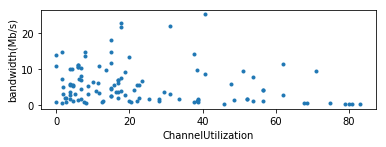

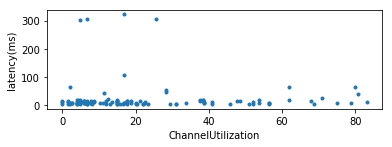

In [16]:
ChannelUtilization = array_all_2[:,2]
plt.subplot(211)
plt.xlabel("ChannelUtilization")
plt.ylabel("bandwidth(Mb/s)")
plt.plot(ChannelUtilization, bandwidth, '.')
plt.show()
plt.subplot(212)
plt.xlabel("ChannelUtilization")
plt.ylabel("latency(ms)")
plt.plot(ChannelUtilization, lantency, '.')
plt.show()

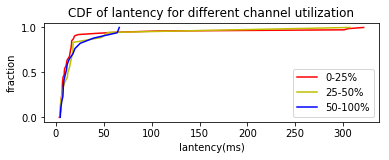

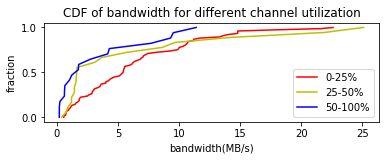

In [17]:
ChannelUtilization = array_all_2[:,2]
ChannelUtilization_lantency_33 = []
ChannelUtilization_bandwidth_33 = []
ChannelUtilization_lantency_66 = []
ChannelUtilization_bandwidth_66 = []
ChannelUtilization_lantency_100 = []
ChannelUtilization_bandwidth_100 = []
for i in range(len(ChannelUtilization)):
    if ChannelUtilization[i] <= 25:
        ChannelUtilization_lantency_33.append(lantency[i])
        ChannelUtilization_bandwidth_33.append(bandwidth[i])
    elif ChannelUtilization[i] <= 50:
        ChannelUtilization_lantency_66.append(lantency[i])
        ChannelUtilization_bandwidth_66.append(bandwidth[i])
    else:
        ChannelUtilization_lantency_100.append(lantency[i])
        ChannelUtilization_bandwidth_100.append(bandwidth[i])
        
sorted_data = np.sort(ChannelUtilization_lantency_33)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(ChannelUtilization_lantency_66)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)
sorted_data_2 = np.sort(ChannelUtilization_lantency_100)
yvals_2=np.arange(len(sorted_data_2))/float(len(sorted_data_2)-1)

plt.subplot(211) 
plt.title("CDF of lantency for different channel utilization")
plt.ylabel('fraction')
plt.xlabel('lantency(ms)')
plt.plot(sorted_data,  yvals,   'r', label = "0-25%")
plt.plot(sorted_data_1,yvals_1, 'y', label = "25-50%")
plt.plot(sorted_data_2,yvals_2, 'b', label = "50-100%")
plt.legend(loc='lower right')
plt.savefig('test_1')
plt.show()

sorted_data = np.sort(ChannelUtilization_bandwidth_33)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(ChannelUtilization_bandwidth_66)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)
sorted_data_2 = np.sort(ChannelUtilization_bandwidth_100)
yvals_2=np.arange(len(sorted_data_2))/float(len(sorted_data_2)-1)

plt.subplot(211) 
plt.title("CDF of bandwidth for different channel utilization")
plt.ylabel('fraction')
plt.xlabel('bandwidth(MB/s)')
plt.plot(sorted_data,  yvals,   'r', label = "0-25%")
plt.plot(sorted_data_1,yvals_1, 'y', label = "25-50%")
plt.plot(sorted_data_2,yvals_2, 'b', label = "50-100%")
plt.legend(loc='lower right')
plt.savefig('test_1')
plt.show()

['latency', 'ChannelWidth', 'ChannelUtilization', 'MaximumSpeed', 'AverageSignalQuality', 'bandwidth', 'Frequency', 'RSSI', 'type', 'Channel']

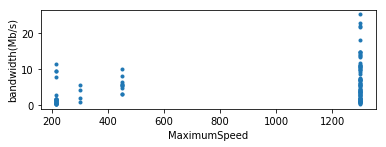

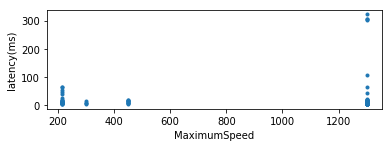

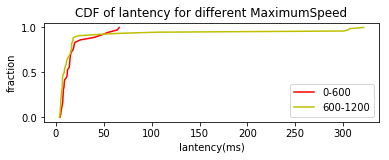

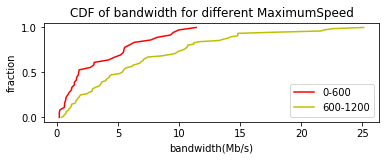

In [18]:
MaximumSpeed = array_all_2[:,3]
plt.subplot(211)
plt.xlabel("MaximumSpeed")
plt.ylabel("bandwidth(Mb/s)")
plt.plot(MaximumSpeed, bandwidth, '.')
plt.show()
plt.subplot(212)
plt.xlabel("MaximumSpeed")
plt.ylabel("latency(ms)")
plt.plot(MaximumSpeed, lantency, '.')
plt.show()

MaximumSpeed_lantency_600 = []
MaximumSpeed_bandwidth_600 = []
MaximumSpeed_lantency_1200 = []
MaximumSpeed_bandwidth_1200 = []
for i in range(len(ChannelUtilization)):
    if MaximumSpeed[i] <= 600:
        MaximumSpeed_lantency_600.append(lantency[i])
        MaximumSpeed_bandwidth_600.append(bandwidth[i])
    else:
        MaximumSpeed_lantency_1200.append(lantency[i])
        MaximumSpeed_bandwidth_1200.append(bandwidth[i])

sorted_data = np.sort(MaximumSpeed_lantency_600)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(MaximumSpeed_lantency_1200)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(211) 
plt.title("CDF of lantency for different MaximumSpeed")
plt.ylabel('fraction')
plt.xlabel('lantency(ms)')
plt.plot(sorted_data,  yvals,   'r', label = "0-600")
plt.plot(sorted_data_1,yvals_1, 'y', label = "600-1200")
plt.legend(loc='lower right')
plt.show()

sorted_data = np.sort(MaximumSpeed_bandwidth_600)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(MaximumSpeed_bandwidth_1200)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(212) 
plt.title("CDF of bandwidth for different MaximumSpeed")
plt.ylabel('fraction')
plt.xlabel('bandwidth(Mb/s)')
plt.plot(sorted_data,  yvals,   'r', label = "0-600")
plt.plot(sorted_data_1,yvals_1, 'y', label = "600-1200")
plt.legend(loc='lower right')
plt.show()

In [19]:
#['latency', 'ChannelWidth', 'ChannelUtilization', 'MaximumSpeed', 'AverageSignalQuality', 'bandwidth', 'Frequency', 'RSSI', 'type', 'Channel']

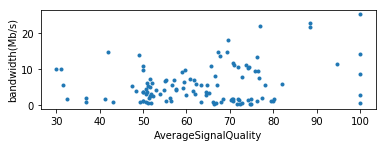

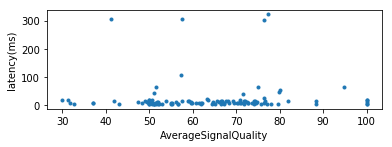

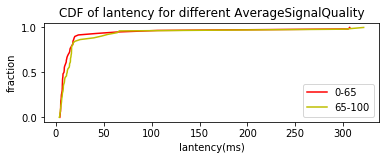

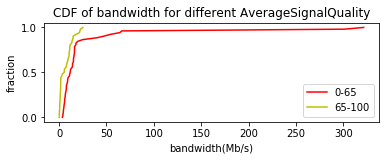

In [20]:
AverageSignalQuality = array_all_2[:,4]
plt.subplot(211)
plt.xlabel("AverageSignalQuality")
plt.ylabel("bandwidth(Mb/s)")
plt.plot(AverageSignalQuality, bandwidth, '.')
plt.show()
plt.subplot(212)
plt.xlabel("AverageSignalQuality")
plt.ylabel("latency(ms)")
plt.plot(AverageSignalQuality, lantency, '.')
plt.show()

AverageSignalQuality_lantency_65 = []
AverageSignalQuality_bandwidth_65 = []
AverageSignalQuality_lantency_100 = []
AverageSignalQuality_bandwidth_100 = []
for i in range(len(ChannelUtilization)):
    if AverageSignalQuality[i] <= 65:
        AverageSignalQuality_lantency_65.append(lantency[i])
        AverageSignalQuality_bandwidth_65.append(bandwidth[i])
    else:
        AverageSignalQuality_lantency_100.append(lantency[i])
        AverageSignalQuality_bandwidth_100.append(bandwidth[i])

sorted_data = np.sort(AverageSignalQuality_lantency_65)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(AverageSignalQuality_lantency_100)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(211) 
plt.title("CDF of lantency for different AverageSignalQuality")
plt.ylabel('fraction')
plt.xlabel('lantency(ms)')
plt.plot(sorted_data,  yvals,   'r', label = "0-65")
plt.plot(sorted_data_1,yvals_1, 'y', label = "65-100")
plt.legend(loc='lower right')
plt.show()

sorted_data = np.sort(AverageSignalQuality_lantency_100)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(AverageSignalQuality_bandwidth_100)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(212) 
plt.title("CDF of bandwidth for different AverageSignalQuality")
plt.ylabel('fraction')
plt.xlabel('bandwidth(Mb/s)')
plt.plot(sorted_data,  yvals,   'r', label = "0-65")
plt.plot(sorted_data_1,yvals_1, 'y', label = "65-100")
plt.legend(loc='lower right')
plt.show()

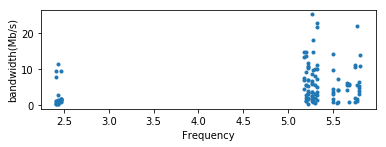

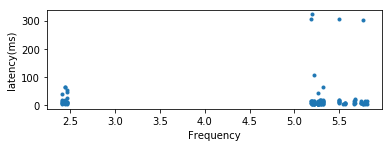

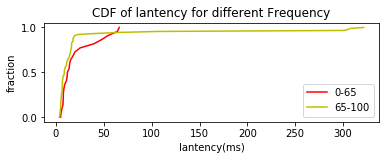

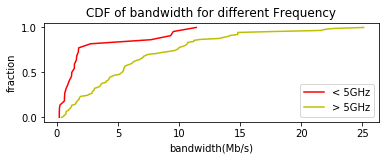

In [21]:
Frequency = array_all_2[:,6]
plt.subplot(211)
plt.xlabel("Frequency")
plt.ylabel("bandwidth(Mb/s)")
plt.plot(Frequency, bandwidth, '.')
plt.show()
plt.subplot(212)
plt.xlabel("Frequency")
plt.ylabel("latency(ms)")
plt.plot(Frequency, lantency, '.')
plt.show()

Frequency_lantency_5 = []
Frequency_bandwidth_5 = []
Frequency_lantency_6 = []
Frequency_bandwidth_6 = []
for i in range(len(ChannelUtilization)):
    if Frequency[i] <= 5:
        Frequency_lantency_5.append(lantency[i])
        Frequency_bandwidth_5.append(bandwidth[i])
    else:
        Frequency_lantency_6.append(lantency[i])
        Frequency_bandwidth_6.append(bandwidth[i])

sorted_data = np.sort(Frequency_lantency_5)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(Frequency_lantency_6)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(211) 
plt.title("CDF of lantency for different Frequency")
plt.ylabel('fraction')
plt.xlabel('lantency(ms)')
plt.plot(sorted_data,  yvals,   'r', label = "0-65")
plt.plot(sorted_data_1,yvals_1, 'y', label = "65-100")
plt.legend(loc='lower right')
plt.show()

sorted_data = np.sort(Frequency_bandwidth_5)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(Frequency_bandwidth_6)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(212) 
plt.title("CDF of bandwidth for different Frequency")
plt.ylabel('fraction')
plt.xlabel('bandwidth(Mb/s)')
plt.plot(sorted_data,  yvals,   'r', label = "< 5GHz")
plt.plot(sorted_data_1,yvals_1, 'y', label = "> 5GHz")
plt.legend(loc='lower right')
plt.show()

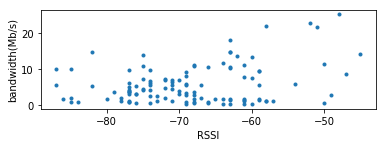

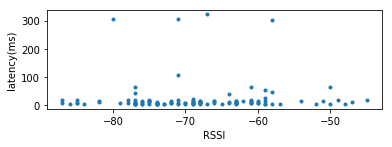

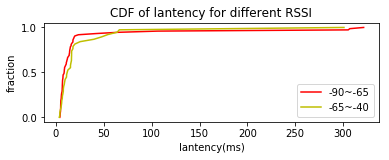

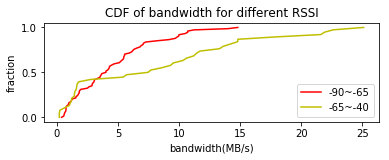

In [22]:
RSSI = array_all_2[:,7]
plt.subplot(211)
plt.xlabel("RSSI")
plt.ylabel("bandwidth(Mb/s)")
plt.plot(RSSI, bandwidth, '.')
plt.show()
plt.subplot(212)
plt.xlabel("RSSI")
plt.ylabel("latency(ms)")
plt.plot(RSSI, lantency, '.')
plt.show()

RSSI_latency_neg_65 = []
RSSI_bandwidth_neg_65 = []
RSSI_latency_neg_50 = []
RSSI_bandwidth_neg_50 = []
for i in range(len(RSSI)):
    if RSSI[i] <= -65:
        RSSI_latency_neg_65.append(lantency[i])
        RSSI_bandwidth_neg_65.append(bandwidth[i])
    else:
        RSSI_latency_neg_50.append(lantency[i])
        RSSI_bandwidth_neg_50.append(bandwidth[i])

sorted_data = np.sort(RSSI_latency_neg_65)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(RSSI_latency_neg_50)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(211) 
plt.title("CDF of lantency for different RSSI")
plt.ylabel('fraction')
plt.xlabel('lantency(ms)')
plt.plot(sorted_data,  yvals,   'r', label = "-90~-65")
plt.plot(sorted_data_1,yvals_1, 'y', label = "-65~-40")
plt.legend(loc='lower right')
plt.show()

sorted_data = np.sort(RSSI_bandwidth_neg_65)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(RSSI_bandwidth_neg_50)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(212) 
plt.title("CDF of bandwidth for different RSSI")
plt.ylabel('fraction')
plt.xlabel('bandwidth(MB/s)')
plt.plot(sorted_data,  yvals,   'r', label = "-90~-65")
plt.plot(sorted_data_1,yvals_1, 'y', label = "-65~-40")
plt.legend(loc='lower right')
plt.show()

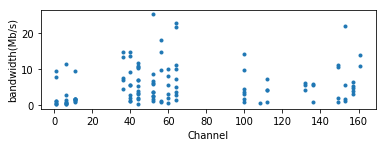

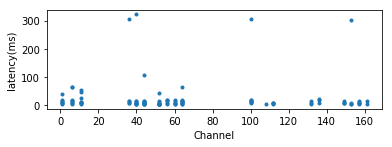

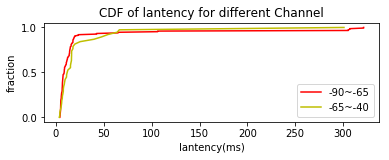

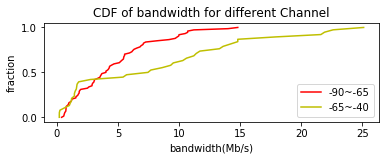

In [23]:
Channel = array_all_2[:,9]
plt.subplot(211)
plt.xlabel("Channel")
plt.ylabel("bandwidth(Mb/s)")
plt.plot(Channel, bandwidth, '.')
plt.show()
plt.subplot(212)
plt.xlabel("Channel")
plt.ylabel("latency(ms)")
plt.plot(Channel, lantency, '.')
plt.show()

Channel_latency_neg_65 = []
RSSI_bandwidth_neg_65 = []
RSSI_latency_neg_50 = []
RSSI_bandwidth_neg_50 = []
for i in range(len(RSSI)):
    if RSSI[i] <= -65:
        RSSI_latency_neg_65.append(lantency[i])
        RSSI_bandwidth_neg_65.append(bandwidth[i])
    else:
        RSSI_latency_neg_50.append(lantency[i])
        RSSI_bandwidth_neg_50.append(bandwidth[i])

sorted_data = np.sort(RSSI_latency_neg_65)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(RSSI_latency_neg_50)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(211) 
plt.title("CDF of lantency for different Channel")
plt.ylabel('fraction')
plt.xlabel('lantency(ms)')
plt.plot(sorted_data,  yvals,   'r', label = "-90~-65")
plt.plot(sorted_data_1,yvals_1, 'y', label = "-65~-40")
plt.legend(loc='lower right')
plt.show()

sorted_data = np.sort(RSSI_bandwidth_neg_65)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
sorted_data_1 = np.sort(RSSI_bandwidth_neg_50)
yvals_1=np.arange(len(sorted_data_1))/float(len(sorted_data_1)-1)

plt.subplot(212) 
plt.title("CDF of bandwidth for different Channel")
plt.ylabel('fraction')
plt.xlabel('bandwidth(Mb/s)')
plt.plot(sorted_data,  yvals,   'r', label = "-90~-65")
plt.plot(sorted_data_1,yvals_1, 'y', label = "-65~-40")
plt.legend(loc='lower right')
plt.show()

In [24]:
for i in range(array_all_2.shape[1] - 1):
    for j in range(i+1, array_all_2.shape[1]): 
        if abs(np.corrcoef(array_all_2[:, i],array_all_2[:, j])[0,1]) > 0.8:
            print attribute_list[i] + " and " + attribute_list[j]
            print np.corrcoef(array_all_2[:, i],array_all_2[:, j])[0,1]

ChannelWidth and MaximumSpeed
0.992684197397
ChannelWidth and Frequency
0.811822451147
ChannelWidth and type
0.975590183573
MaximumSpeed and type
0.992610654003
AverageSignalQuality and RSSI
0.979458978435


ChannelWidth MaximumSpeed AverageSignalQuality
#['ChannelWidth', 'ChannelUtilization', 'MaximumSpeed', 
#'AverageSignalQuality', 'Frequency', 'RSSI', 'type', 'Channel']

In [25]:
array_all_3 = array_all[:,[1,4,5,6,7]]
print array_all_3.shape
array_rssi = array_all_3[:,3]
print array_rssi.shape
list_address_num = [11, 9, 13, 16, 12, 18, 18, 19]
list_address_num[3] -= 2
print array_rssi
print sum(list_address_num)
print list_address_num

(114, 5)
(114,)
[ 1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.
  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.
  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.
  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.
  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.
  1.  1.  0.  0.  1.  0.]
114
[11, 9, 13, 14, 12, 18, 18, 19]


In [26]:
list_address_num_c = [11,20,33,47,59,77,95,114]
list_ = []
for i in range(len(list_address_num_c)):
    if i == 0:
        list_.append(array_rssi[:list_address_num_c[i]])
    else:
        list_.append(array_rssi[list_address_num_c[i-1] : list_address_num_c[i]])
print list_

[array([ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]), array([ 1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.]), array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.]), array([ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.]), array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.]), array([ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.]), array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  0.]), array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  0.])]


In [27]:
rssi = array_all_3[:, 2]
print int(len(rssi) * 0.2)
z = np.argsort(rssi)
predict_label = []
for ele in z:
    if ele >= 92:
        predict_label.append(1)
    else:
        predict_label.append(0)
true_pos = 0
for i in range(len(predict_label)):
    if predict_label[i] == 1 and predict_label[i] == list_label[i]:
        true_pos += 1
print true_pos        

22
4


In [37]:
position = ["cse3f_guest", "cse3f_protect", "lib_guest", "lib_protect",
            "pc_guest_1", "pc_guest_2", "pc_protected_1", "pc_protected_2"]
from sklearn import tree
#different for testing
#print array_all.shape
recall_tree = []
accuracy_tree = []
for i in range(len(list_address_num)):
    pre_ = sum(list_address_num[:i])
    post_ = sum(list_address_num[i + 1:])
    label_pick = list_label[:pre_] + list_label[-post_:]
    np_label = np.asarray(label_pick)
    array_pick = np.concatenate((array_all_3[:pre_], array_all_3[-post_:]))
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(array_pick, np_label)
    
    res = clf.predict(array_all_3[pre_:-(post_+1)])
    print res
    true_label = list_label[pre_: -(post_+1)]
    cnt = 0
    
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    for j in range(res.shape[0]):
        if res[j] == true_label[j]:
            cnt += 1
            if true_label[j] == 1:
                true_pos += 1
            else: 
                true_neg += 1
        
        elif true_label[j] == 1:
            false_pos += 1
        else:
            false_neg += 1
    print position[i] + ": " + str(cnt) + " out of " + str(res.shape[0])
    print "pos: " + str(true_label.count(1)) + " " + "neg: " + str(true_label.count(0))
    print "true_pos: " + str(true_pos) + " " + "true_neg: " + str(true_neg) + " " + "false_pos: " + str(false_pos) + " " + "false_neg: " + str(false_neg)
    print " "   
    if true_pos != 0:
        recall = true_pos * 1.0 / true_label.count(1)
        arruracy = true_pos * 1.0 / (true_pos + false_neg)
    else:
        recall = 0
        arruracy = 0
    recall_tree.append(recall)
    accuracy_tree.append(arruracy)
    print "recall: ",recall 
    print "arruracy: ",arruracy
    print " "
    


[0 1 1 1 0 0 0 0 0 0]
cse3f_guest: 10 out of 10
pos: 3 neg: 7
true_pos: 3 true_neg: 7 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
[0 0 1 0 1 0 0 1]
cse3f_protect: 7 out of 8
pos: 2 neg: 6
true_pos: 2 true_neg: 5 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.666666666667
 
[0 0 0 0 0 0 0 1 1 0 0 1]
lib_guest: 8 out of 12
pos: 3 neg: 9
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 2
 
recall:  0.333333333333
arruracy:  0.333333333333
 
[0 1 0 0 1 0 1 0 1 0 1 0 0]
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 3 true_neg: 8 false_pos: 0 false_neg: 2
 
recall:  1.0
arruracy:  0.6
 
[0 1 0 1 1 0 0 0 0 0 0]
pc_guest_1: 7 out of 11
pos: 3 neg: 8
true_pos: 1 true_neg: 6 false_pos: 2 false_neg: 2
 
recall:  0.333333333333
arruracy:  0.333333333333
 
[0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
pc_guest_2: 11 out of 17
pos: 4 neg: 13
true_pos: 1 true_neg: 10 false_pos: 3 false_neg: 3
 
recall:  0.25
arruracy:  0.25
 
[0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]
pc_protected_1: 13 out o

In [29]:
dot_data = tree.export_graphviz(clf, out_file='tree.dot', 
                         feature_names= ['ChannelUtilization', 'Frequency', 'RSSI', 'type', 'Channel'],  
                         class_names=["good ap", "bad ap"],  
                         filled=True, rounded=True,  
                         special_characters=True,
                         max_depth = 4)

In [30]:
position = ["cse3f_guest", "cse3f_protect", "lib_guest", "lib_protect",
            "pc_guest_1", "pc_guest_2", "pc_protected_1", "pc_protected_2"]
from sklearn import svm
#different for testing
#print array_all.shape
recall_svm = []
accuracy_svm = []
for i in range(len(list_address_num)):
    pre_ = sum(list_address_num[:i])
    post_ = sum(list_address_num[i + 1:])
    label_pick = list_label[:pre_] + list_label[-post_:]
    np_label = np.asarray(label_pick)
    array_pick = np.concatenate((array_all_3[:pre_], array_all_3[-post_:]))
    
    clf = svm.SVC()
    clf = clf.fit(array_pick, np_label)
    
    res = clf.predict(array_all_3[pre_:-(post_+1)])
    true_label = list_label[pre_: -(post_+1)]
    cnt = 0
    
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    for j in range(res.shape[0]):
        if res[j] == true_label[j]:
            cnt += 1
            if true_label[j] == 1:
                true_pos += 1
            else: 
                true_neg += 1
        
        elif true_label[j] == 1:
            false_pos += 1
        else:
            false_neg += 1
    print position[i] + ": " + str(cnt) + " out of " + str(res.shape[0])
    print "pos: " + str(true_label.count(1)) + " " + "neg: " + str(true_label.count(0))
    print "true_pos: " + str(true_pos) + " " + "true_neg: " + str(true_neg) + " " + "false_pos: " + str(false_pos) + " " + "false_neg: " + str(false_neg)
    
    if true_pos != 0:
        recall = true_pos * 1.0 / true_label.count(1)
        arruracy = true_pos * 1.0 / (true_pos + false_neg)
    else:
        recall = 0
        arruracy = 0
    recall_svm.append(recall)
    accuracy_svm.append(arruracy)
    print "recall: ",recall 
    print "arruracy: ",arruracy
    print " "

cse3f_guest: 7 out of 10
pos: 3 neg: 7
true_pos: 0 true_neg: 7 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
cse3f_protect: 6 out of 8
pos: 2 neg: 6
true_pos: 0 true_neg: 6 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
lib_guest: 9 out of 12
pos: 3 neg: 9
true_pos: 0 true_neg: 9 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 0 true_neg: 10 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_1: 8 out of 11
pos: 3 neg: 8
true_pos: 0 true_neg: 8 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_2: 13 out of 17
pos: 4 neg: 13
true_pos: 0 true_neg: 13 false_pos: 4 false_neg: 0
recall:  0
arruracy:  0
 
pc_protected_1: 13 out of 17
pos: 4 neg: 13
true_pos: 0 true_neg: 13 false_pos: 4 false_neg: 0
recall:  0
arruracy:  0
 
pc_protected_2: 15 out of 18
pos: 3 neg: 15
true_pos: 0 true_neg: 15 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 


In [31]:
position = ["cse3f_guest", "cse3f_protect", "lib_guest", "lib_protect",
            "pc_guest_1", "pc_guest_2", "pc_protected_1", "pc_protected_2"]
from sklearn.ensemble import RandomForestClassifier
#different for testing
#print array_all.shape
recall_random = []
accuracy_random = []
for i in range(len(list_address_num)):
    pre_ = sum(list_address_num[:i])
    post_ = sum(list_address_num[i + 1:])
    label_pick = list_label[:pre_] + list_label[-post_:]
    np_label = np.asarray(label_pick)
    array_pick = np.concatenate((array_all_3[:pre_], array_all_3[-post_:]))
    
    clf = RandomForestClassifier(max_depth=3, random_state=0)
    clf = clf.fit(array_pick, np_label)
    
    res = clf.predict(array_all_3[pre_:-(post_+1)])
    true_label = list_label[pre_: -(post_+1)]
    cnt = 0
    
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    for j in range(res.shape[0]):
        if res[j] == true_label[j]:
            cnt += 1
            if true_label[j] == 1:
                true_pos += 1
            else: 
                true_neg += 1
        
        elif true_label[j] == 1:
            false_pos += 1
        else:
            false_neg += 1
    print position[i] + ": " + str(cnt) + " out of " + str(res.shape[0])
    print "pos: " + str(true_label.count(1)) + " " + "neg: " + str(true_label.count(0))
    print "true_pos: " + str(true_pos) + " " + "true_neg: " + str(true_neg) + " " + "false_pos: " + str(false_pos) + " " + "false_neg: " + str(false_neg)
    print " "
    
    if true_pos != 0:
        recall = true_pos * 1.0 / true_label.count(1)
        arruracy = true_pos * 1.0 / (true_pos + false_neg)
    else:
        recall = 0
        arruracy = 0
    recall_random.append(recall)
    accuracy_random.append(arruracy)
    print "recall: ",recall 
    print "arruracy: ",arruracy
    print " "

cse3f_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
cse3f_protect: 6 out of 8
pos: 2 neg: 6
true_pos: 1 true_neg: 5 false_pos: 1 false_neg: 1
 
recall:  0.5
arruracy:  0.5
 
lib_guest: 9 out of 12
pos: 3 neg: 9
true_pos: 0 true_neg: 9 false_pos: 3 false_neg: 0
 
recall:  0
arruracy:  0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 1
 
recall:  0.333333333333
arruracy:  0.5
 
pc_guest_1: 9 out of 11
pos: 3 neg: 8
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
pc_guest_2: 14 out of 17
pos: 4 neg: 13
true_pos: 1 true_neg: 13 false_pos: 3 false_neg: 0
 
recall:  0.25
arruracy:  1.0
 
pc_protected_1: 14 out of 17
pos: 4 neg: 13
true_pos: 1 true_neg: 13 false_pos: 3 false_neg: 0
 
recall:  0.25
arruracy:  1.0
 
pc_protected_2: 16 out of 18
pos: 3 neg: 15
true_pos: 1 true_neg: 15 false_pos: 2 false_neg: 0
 
recall:  0.333333

In [32]:
from sklearn.naive_bayes import GaussianNB
position = ["cse3f_guest", "cse3f_protect", "lib_guest", "lib_protect",
            "pc_guest_1", "pc_guest_2", "pc_protected_1", "pc_protected_2"]

#different for testing
#print array_all.shape
recall_naive_bayes = []
accuracy_naive_bayes = [] 
for i in range(len(list_address_num)):
    pre_ = sum(list_address_num[:i])
    post_ = sum(list_address_num[i + 1:])
    label_pick = list_label[:pre_] + list_label[-post_:]
    np_label = np.asarray(label_pick)
    array_pick = np.concatenate((array_all_3[:pre_], array_all_3[-post_:]))
    
    clf = GaussianNB()
    clf = clf.fit(array_pick, np_label)
    
    res = clf.predict(array_all_3[pre_:-(post_+1)])
    true_label = list_label[pre_: -(post_+1)]
    cnt = 0
    
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    for j in range(res.shape[0]):
        if res[j] == true_label[j]:
            cnt += 1
            if true_label[j] == 1:
                true_pos += 1
            else: 
                true_neg += 1
        
        elif true_label[j] == 1:
            false_pos += 1
        else:
            false_neg += 1
    print position[i] + ": " + str(cnt) + " out of " + str(res.shape[0])
    print "pos: " + str(true_label.count(1)) + " " + "neg: " + str(true_label.count(0))
    print "true_pos: " + str(true_pos) + " " + "true_neg: " + str(true_neg) + " " + "false_pos: " + str(false_pos) + " " + "false_neg: " + str(false_neg)
    print " " 
    
    if true_pos != 0:
        recall = true_pos * 1.0 / true_label.count(1)
        arruracy = true_pos * 1.0 / (true_pos + false_neg)
    else:
        recall = 0
        arruracy = 0
    recall_naive_bayes.append(recall)
    accuracy_naive_bayes.append(arruracy)
    print "recall: ",recall 
    print "arruracy: ",arruracy
    print " "

cse3f_guest: 9 out of 10
pos: 3 neg: 7
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.666666666667
arruracy:  1.0
 
cse3f_protect: 7 out of 8
pos: 2 neg: 6
true_pos: 2 true_neg: 5 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.666666666667
 
lib_guest: 11 out of 12
pos: 3 neg: 9
true_pos: 3 true_neg: 8 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.75
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 2 true_neg: 8 false_pos: 1 false_neg: 2
 
recall:  0.666666666667
arruracy:  0.5
 
pc_guest_1: 8 out of 11
pos: 3 neg: 8
true_pos: 2 true_neg: 6 false_pos: 1 false_neg: 2
 
recall:  0.666666666667
arruracy:  0.5
 
pc_guest_2: 7 out of 17
pos: 4 neg: 13
true_pos: 3 true_neg: 4 false_pos: 1 false_neg: 9
 
recall:  0.75
arruracy:  0.25
 
pc_protected_1: 12 out of 17
pos: 4 neg: 13
true_pos: 3 true_neg: 9 false_pos: 1 false_neg: 4
 
recall:  0.75
arruracy:  0.428571428571
 
pc_protected_2: 8 out of 18
pos: 3 neg: 15
true_pos: 2 true_neg: 6 false_pos: 1 false_ne

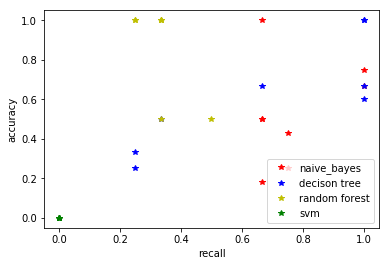

In [33]:
plt.ylabel('accuracy')
plt.xlabel('recall')

plt.plot(recall_naive_bayes,  accuracy_naive_bayes,   'r*', label = "naive_bayes")
plt.plot(recall_tree,  accuracy_tree,   'b*', label = "decison tree")
plt.plot(recall_random, accuracy_random, 'y*', label = "random forest")
plt.plot(recall_svm, accuracy_svm, 'g*', label = "svm")
plt.legend(loc='lower right')
plt.show()

In [34]:
recall_naive_bayes_rate = sum(recall_naive_bayes)*1.0 / len(recall_naive_bayes)
accuracy_naive_bayes_rate = sum(accuracy_naive_bayes)*1.0 / len(accuracy_naive_bayes)
recall_tree_rate = sum(recall_tree)*1.0 / len(recall_tree)
accuracy_tree_rate = sum(accuracy_tree)*1.0 / len(accuracy_tree)
recall_svm_rate = sum(recall_svm)*1.0 / len(recall_svm)
accuracy_svm_rate = sum(accuracy_svm)*1.0 / len(accuracy_svm)
recall_random_rate = sum(recall_random)*1.0 / len(recall_random)
accuracy_random_rate = sum(accuracy_random)*1.0 / len(accuracy_random)
print "recall_naive_bayes_rate: ", recall_naive_bayes_rate
print "accuracy_naive_bayes_rate: ", accuracy_naive_bayes_rate
print "recall_tree_rate: ", recall_tree_rate
print "accuracy_tree_rate: ", accuracy_tree_rate
print "recall_svm_rate: ", recall_svm_rate
print "accuracy_svm_rate: ", accuracy_svm_rate
print "recall_random_rate: ", recall_random_rate
print "accuracy_random_rate: ", accuracy_random_rate

recall_naive_bayes_rate:  0.770833333333
accuracy_naive_bayes_rate:  0.534632034632
recall_tree_rate:  0.6875
accuracy_tree_rate:  0.627083333333
recall_svm_rate:  0.0
accuracy_svm_rate:  0.0
recall_random_rate:  0.291666666667
accuracy_random_rate:  0.75


In [35]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = clf.fit(iris.data, iris.target)

tree.export_graphviz(clf, out_file='tree_1.dot') 

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.